# $6^{th}$ excercise

## Notebook setup

#### Used libraries

In [30]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

#### Colors, just for fun

In [31]:
stb = "#191724" #background
ndb = "#26233a" #object background
ste = "#e0def4" #main elements
nde = "#f6c177" #additional elements
rde = "#eb6f92" #element in evidence
err = "#908caa" #error bar
er2 = "#6e6a86" #second error bar

## 06.1 - 1D Ising model
### Introductory notes
Ising model wal firstly formulated to describe the ferromagnetic phase transition at low temperature in materials, though being so general that it is still used in a variety of problems. It is based, in its 1d version, on the following assumpitons:
- we are working with a lattice of spins, objects whose value can only be $\pm 1$ (up or down)
- only adjacent spins can interact
- spins can interact with an external field
The Hamiltonian of this model for $N$ spins assumes the following form
\begin{equation}
H(\sigma_1\dots\sigma_N)=-\frac{J}{2}\sum_{\langle i,j \rangle}^N \sigma_i\sigma_j - h \sum_i^N \sigma_i
\end{equation}
Where $J$ is the coupling constant and $h$ the external field.

The Maxwell-Boltzman pdf is maximized if $\sigma_i\sigma_j$ has the same sign of $J$ and if $\sigma_i$ has the same sign of h that is spins tend to align with $h$ and to be parallel if $J$ is positive. 

The 1D Ising model is one of the few models is statistical mechanics that are exactly solvable. What we want to do is to compare the exact solutions with those obtained by means of numerical simulation, using Metropolis and Gibbs sampling alghorithms.

#### Metropolis
Let's call $\mu$ a particular spin configuration. We use metropolis with the symmetric $T(\mu'|\mu)=$"changing one of the spins randomly". Being $p$ in the form of an exponential and having only two possible values for each spin the acceptance probability boils down to

\begin{equation}
A(\mu'|\mu}=min(1,e^{-2\beta s_k(J(s_{k-1}+s_{k+1})+h)})
\end{equation}

(RIVEDO)

#### Gibbs
Gibbs alghorithm is used when the conditional pdf is easyer to calculate than the joint one. At step $n+1$, with $N$ random variables the alghorithm is $\dots x_i \tilde p_{1|n}(x_i^n|x_1ìn\dots x_{i-1}^n,x_{i+1}^n,\dots x_N^n}\dots$. When applying this metod to the Ising model, using the definition of conditional probability and expanding the integral in the marginal as a sum of two pdf, one with $\sigma_i=+1$ and the other with $\sigma_i=-1$ we get the nice expression:

...


### Brief recap
**Goal:** Evaluate $U(N,T,h)$, $C(N,T,h)$, $\chi(N,T,h)$ for $h=0$ and $M(N,T,h)$ for $h=0.2$, with $N=50$,$J=1$ and $T\in[0.5,2]$, using Metropolis and Gibbs alghorythm.

**Expectations:** We expect the data obtained through simulation to almost exactly follow the analitical solution

**Implementation notes:** The C++ programs perform the simulation for fixed T using datablocking. A python script (`061.py` in the home directory of the project) runs the simulations with the selected sampling alghorythm and the selected value for h, automatically changing T 50 times and saving the results of each simulation.
The proposed implementation for $\chi$ is only valid at $h=0$ where $\langle H \rangle =0$. This had to be superimposed because in the simulation it wouldn't have been exactly zero, introducing an error.

For each simulation we used 20 blocks of 10000 steps each.

---

### Equilibration

We are trying to simulate the sistem at equilibrium but we will almost surely start the simulation out of equilibrium (in this case we decided to start at $T=\infty$, that means completly random spins). So we must find a time after which we are sure our system has reached equilibrium and only then start the actual simulation, in order for the estimation of relevant auantities not to be affected by the values taken in the out-of-equilibrium phase. To do so, we are going to plot a relevant quantity and see when it reaches a stable value. It has been done by adding a new parameter to the code `tc`, defined the number of steps required by the calibration and a function `void equilibrate()` which performs `tc` moves without evaluating any relevant quantity.

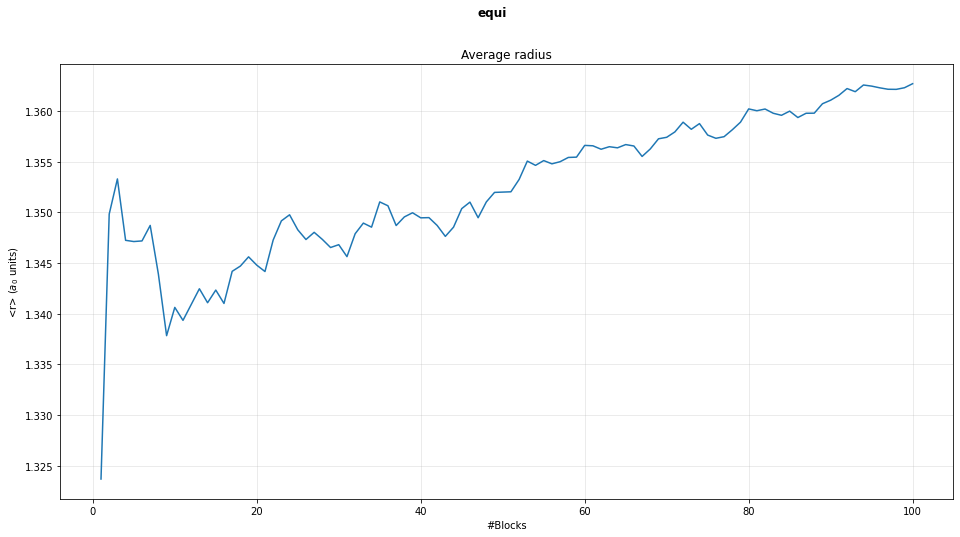

In [32]:
fig=plt.figure(figsize=(16, 8))
plt.suptitle('equi', weight='bold')

x,y,e=np.loadtxt("out/output.chi.0", usecols=(0,2,3), unpack=True )


#plt.hlines(1.5,0, conf_db["N_BLOCKS"],color=rde)
#posso mettere insieme a errorbar? ha senso cambiare tipo di grafico?
#plt.vlines(x,y-e,y+e,alpha=0.8)
plt.errorbar(x,y)

plt.xlabel('#Blocks')
plt.ylabel('<r> ($a_0$ units)')
plt.title("Average radius")
plt.grid(alpha=0.3)

## RIsultati

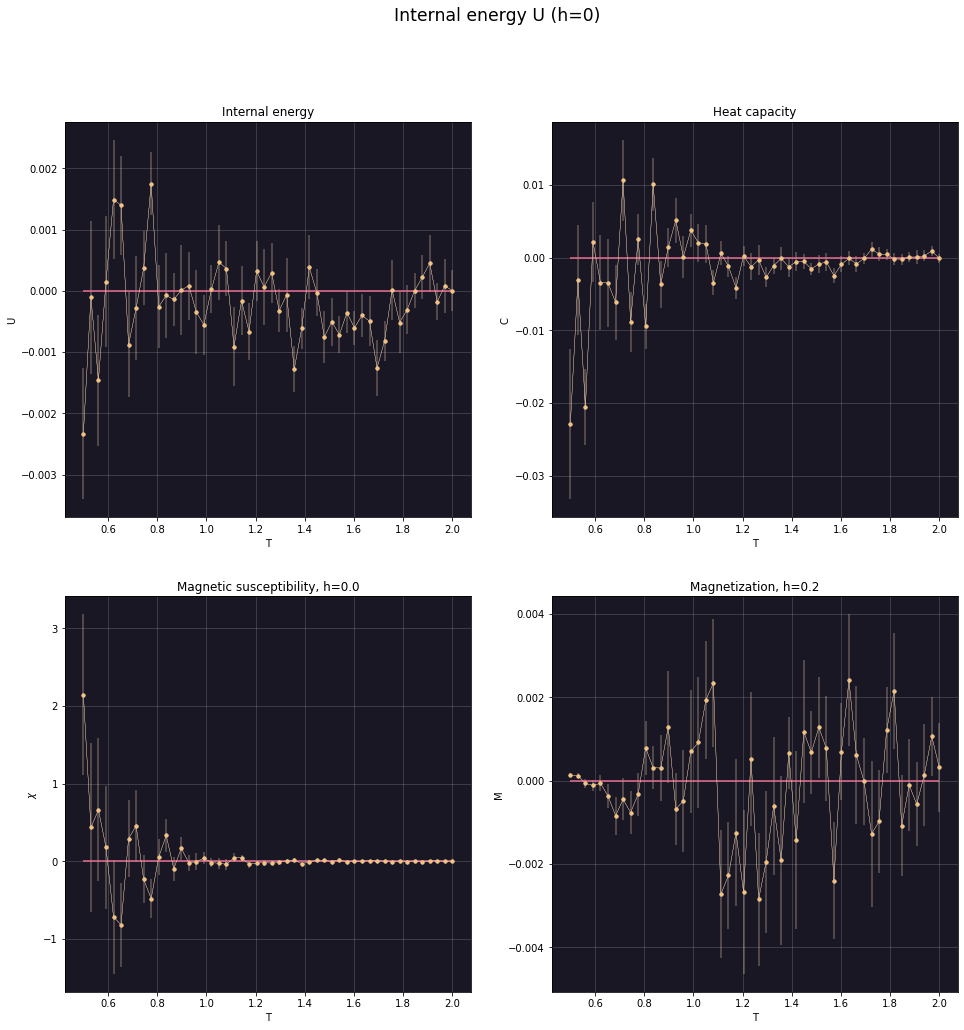

In [39]:
points=50
T = np.linspace(0.5,2.,points)

##theorical quantities
beta = 1/T
b=beta
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

ene = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

h=0.2
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



fig=plt.figure(figsize=(16,16))
plt.suptitle('Internal energy U (h=0)', size='xx-large')

x=np.linspace(0.5,2,points)
#Internal energy
ym,em = np.loadtxt("store/061-mrt2_ene-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_ene-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(221)
fig.axes[0].set_facecolor(stb)

plt.errorbar(T,ym-ene, yerr=em,linewidth = 0.3, marker = '.',color=ste)
plt.errorbar(T,yg-ene, yerr=eg,linewidth = 0.3, marker = '.',color=nde)
plt.hlines(0, 0.5,2,color=rde)
plt.title('Internal energy')
plt.xlabel('T')
plt.ylabel('U')
plt.grid(alpha=0.3)


#Heat capacity
ym,em = np.loadtxt("store/061-mrt2_heat-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_heat-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(222)
fig.axes[1].set_facecolor(stb)

plt.errorbar(T,ym-heat, yerr=em,linewidth = 0.3, marker = '.',color=ste)
plt.errorbar(T,yg-heat, yerr=eg,linewidth = 0.3, marker = '.',color=nde)
plt.hlines(0, 0.5,2,color=rde)
plt.title('Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(alpha=0.3)


#Magnetic susceptibility
ym,em = np.loadtxt("store/061-mrt2_chi-h=0.0", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_chi-h=0.0", usecols=(2,3), unpack=True)

plt.subplot(223)
fig.axes[2].set_facecolor(stb)

plt.errorbar(T,ym-chi, yerr=em,linewidth = 0.3, marker = '.',color=ste)
plt.errorbar(T,yg-chi, yerr=eg,linewidth = 0.3, marker = '.',color=nde)
plt.hlines(0, 0.5,2,color=rde)
plt.title('Magnetic susceptibility, h=0.0')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(alpha=0.3)


#Magnetization
ym,em = np.loadtxt("store/061-mrt2_mag-h=0.2", usecols=(2,3), unpack=True)
yg,eg = np.loadtxt("store/061-gibbs_mag-h=0.2", usecols=(2,3), unpack=True)

plt.subplot(224)
fig.axes[3].set_facecolor(stb)

plt.errorbar(T,ym-mag, yerr=em,linewidth = 0.3, marker = '.',color=ste)
plt.errorbar(T,yg-mag, yerr=eg,linewidth = 0.3, marker = '.',color=nde)
plt.hlines(0, 0.5,2,color=rde)
plt.title('Magnetization, h=0.2')
plt.xlabel('T')
plt.ylabel('M')
plt.grid(alpha=0.3)


plt.show()
